# Cyclistic Bike-Share Analysis Case Study

This case study is the capstone project of the Google Data Analytics Professional Certificate. The case-study is based on the 6 steps of the data analysis process:
1. Ask
2. Prepare
3. Process
4. Analyze
5. Share
6. Act



# Cyclistic Company
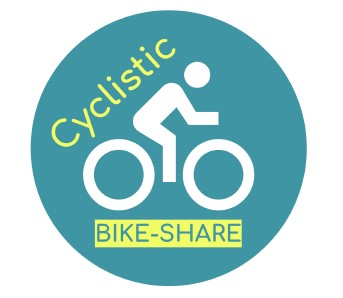

A bike-share program that features more than 5,800 bicycles and 600 docking stations in Chicago. Cyclistic offers reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities
and riders who can’t use a standard two-wheeled bike.

Until now, Cyclistic’s marketing strategy relied on the flexibility of its pricing plans:
1. Single-ride passes.
2. Full-day passes.
3. Annual memberships.

Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.


Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Lily Moreno, the Director of marketing, believes that maximizing the number of annual members will be key to future growth.
 Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members


# Ask

**What is the problem you are trying to solve?**

We are trying to understand rider behaviors and provide recommendations on how to design a new marketing strategy to convert casual riders into annual members.

**How can insights drive business decisions?**

Using the datset,  we will be able to analyze and understand how the behaviors of casual riders differ from members. This analysis will lead to insights and visualizations, which enables us to make suggestions on how to convert casual riders into annual members.

# Prepare

For the purpose of this study, the data included is for the year 2022, [Download the data for other years here](https://divvy-tripdata.s3.amazonaws.com/index.html). This public data has been made available by Motivate International Inc. under this [license](https://divvybikes.com/data-license-agreement).

The data for 2022 is seperated by month, each file was downloaded as csv files and each file has the name format: '2022MM-divvy-tripdata'.


# Process

This section contains multiple steps required to process the dataset, including:

* Importing the necessary libraries.
* Merging the 12 monthly files into one and viewing information and summaries about the dataset.
* Handling errors, addressing missing values, changing data types, and editing or adding columns.





In [ ]:
# import the nesseccary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

Since the data is separated into different files for each month, this part shows how the data looks, including the information, columns, rows, and columns data types for each month file.

Replace xx in 2022xx- with the month number to view the data information.

In [ ]:
# view summary of the data and first 5 rows
df_x = pd.read_csv("/content/202203-divvy-tripdata.csv")
df_x.info()
df_x.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284042 entries, 0 to 284041
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             284042 non-null  object 
 1   rideable_type       284042 non-null  object 
 2   started_at          284042 non-null  object 
 3   ended_at            284042 non-null  object 
 4   start_station_name  236796 non-null  object 
 5   start_station_id    236796 non-null  object 
 6   end_station_name    232885 non-null  object 
 7   end_station_id      232885 non-null  object 
 8   start_lat           284042 non-null  float64
 9   start_lng           284042 non-null  float64
 10  end_lat             283776 non-null  float64
 11  end_lng             283776 non-null  float64
 12  member_casual       284042 non-null  object 
dtypes: float64(4), object(9)
memory usage: 28.2+ MB


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,47EC0A7F82E65D52,classic_bike,2022-03-21 13:45:01,2022-03-21 13:51:18,Wabash Ave & Wacker Pl,TA1307000131,Kingsbury St & Kinzie St,KA1503000043,41.886875,-87.626030,41.889177,-87.638506,member
1,8494861979B0F477,electric_bike,2022-03-16 09:37:16,2022-03-16 09:43:34,Michigan Ave & Oak St,13042,Orleans St & Chestnut St (NEXT Apts),620,41.900998,-87.623752,41.898203,-87.637536,member
2,EFE527AF80B66109,classic_bike,2022-03-23 19:52:02,2022-03-23 19:54:48,Broadway & Berwyn Ave,13109,Broadway & Ridge Ave,15578,41.978353,-87.659753,41.984045,-87.660274,member
3,9F446FD9DEE3F389,classic_bike,2022-03-01 19:12:26,2022-03-01 19:22:14,Wabash Ave & Wacker Pl,TA1307000131,Franklin St & Jackson Blvd,TA1305000025,41.886875,-87.626030,41.877708,-87.635321,member
4,431128AD9AFFEDC0,classic_bike,2022-03-21 18:37:01,2022-03-21 19:19:11,DuSable Lake Shore Dr & North Blvd,LF-005,Loomis St & Jackson Blvd,13206,41.911722,-87.626804,41.877945,-87.662007,member


In [ ]:
files = glob.glob('*.csv')
df = pd.concat([pd.read_csv(file) for file in files ], ignore_index=True)

Number of rows and columns in the data

In [ ]:
# number of rows and columns
df.shape

(5667717, 13)

View the count of nulls for every column.

In [ ]:
# count of nulls
print(df.isnull().sum())

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64


Get the unique values for 'rideable_type' and 'member_casual' columns (to rename the columns).

In [ ]:
# unique values in rideable_type, member_casual
df['rideable_type'].unique()

array(['electric_bike', 'classic_bike', 'docked_bike'], dtype=object)

In [ ]:
# unique values in member_casual
df['member_casual'].unique()

array(['casual', 'member'], dtype=object)

## Data Manipulation

In [ ]:
# make a copy to work on
df_1 = df.copy()

Handle null values & Unused columns.

In [ ]:
# get null values
df_1.isnull().sum()

,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,833064
start_station_id,833064
end_station_name,892742
end_station_id,892742
start_lat,0
start_lng,0


Drop unnecessary columns.

In [ ]:
# drop columns
df_1.drop(['ride_id', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng'], axis=1, inplace=True)

Check null values again.

In [ ]:
# check
df_1.isnull().sum()

,0
rideable_type,0
started_at,0
ended_at,0
member_casual,0


Change columns names.

In [ ]:
# rename columns
df_1.rename(columns={'rideable_type': 'bike_type',
                     'started_at': 'start_date_time',
                     'ended_at': 'end_date_time',
                     'member_casual': 'rider_type'}, inplace=True)

In [ ]:
df_1.head()

,bike_type,start_date_time,end_date_time,rider_type
0,electric_bike,2022-09-01 08:36:22,2022-09-01 08:39:05,casual
1,electric_bike,2022-09-01 17:11:29,2022-09-01 17:14:45,casual
2,electric_bike,2022-09-01 17:15:50,2022-09-01 17:16:12,casual
3,electric_bike,2022-09-01 09:00:28,2022-09-01 09:10:32,casual
4,electric_bike,2022-09-01 07:30:11,2022-09-01 07:32:36,casual


Change date_time columns data type to datetime.

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 4 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   bike_type        object
 1   start_date_time  object
 2   end_date_time    object
 3   rider_type       object
dtypes: object(4)
memory usage: 173.0+ MB


In [ ]:
df_1['start_date_time'] = pd.to_datetime(df_1['start_date_time'])
df_1['end_date_time'] = pd.to_datetime(df_1['end_date_time'])

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 4 columns):
 #   Column           Dtype         
---  ------           -----         
 0   bike_type        object        
 1   start_date_time  datetime64[ns]
 2   end_date_time    datetime64[ns]
 3   rider_type       object        
dtypes: datetime64[ns](2), object(2)
memory usage: 173.0+ MB



Seperate start_date_time into: start_time, start_date, start_month, start_day

Seperate end_date_time into: end_time, end_date, end_month, end_day

In [ ]:
df_1['start_date'] = df_1['start_date_time'].dt.date
df_1['start_time'] = df_1['start_date_time'].dt.time
df_1['start_month'] = df_1['start_date_time'].dt.month_name()
df_1['start_day'] = df_1['start_date_time'].dt.day_name()


df_1['end_date'] = df_1['end_date_time'].dt.date
df_1['end_time'] = df_1['end_date_time'].dt.time
df_1['end_month'] = df_1['end_date_time'].dt.month_name()
df_1['end_day'] = df_1['end_date_time'].dt.day_name()

In [ ]:
df_1.info()
df_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 12 columns):
 #   Column           Dtype         
---  ------           -----         
 0   bike_type        object        
 1   start_date_time  datetime64[ns]
 2   end_date_time    datetime64[ns]
 3   rider_type       object        
 4   start_date       object        
 5   start_time       object        
 6   start_month      object        
 7   start_day        object        
 8   end_date         object        
 9   end_time         object        
 10  end_month        object        
 11  end_day          object        
dtypes: datetime64[ns](2), object(10)
memory usage: 518.9+ MB


,bike_type,start_date_time,end_date_time,rider_type,start_date,start_time,start_month,start_day,end_date,end_time,end_month,end_day
0,electric_bike,2022-09-01 08:36:22,2022-09-01 08:39:05,casual,2022-09-01,08:36:22,September,Thursday,2022-09-01,08:39:05,September,Thursday
1,electric_bike,2022-09-01 17:11:29,2022-09-01 17:14:45,casual,2022-09-01,17:11:29,September,Thursday,2022-09-01,17:14:45,September,Thursday
2,electric_bike,2022-09-01 17:15:50,2022-09-01 17:16:12,casual,2022-09-01,17:15:50,September,Thursday,2022-09-01,17:16:12,September,Thursday
3,electric_bike,2022-09-01 09:00:28,2022-09-01 09:10:32,casual,2022-09-01,09:00:28,September,Thursday,2022-09-01,09:10:32,September,Thursday
4,electric_bike,2022-09-01 07:30:11,2022-09-01 07:32:36,casual,2022-09-01,07:30:11,September,Thursday,2022-09-01,07:32:36,September,Thursday


Calculate ride_length of each ride by subtracting the end_date_time - start_date_time

In [ ]:
df_1['ride_length'] = df_1['end_date_time'] - df_1['start_date_time']

In [ ]:
df_1.head()

,bike_type,start_date_time,end_date_time,rider_type,start_date,start_time,start_month,start_day,end_date,end_time,end_month,end_day,ride_length
0,electric_bike,2022-09-01 08:36:22,2022-09-01 08:39:05,casual,2022-09-01,08:36:22,September,Thursday,2022-09-01,08:39:05,September,Thursday,0 days 00:02:43
1,electric_bike,2022-09-01 17:11:29,2022-09-01 17:14:45,casual,2022-09-01,17:11:29,September,Thursday,2022-09-01,17:14:45,September,Thursday,0 days 00:03:16
2,electric_bike,2022-09-01 17:15:50,2022-09-01 17:16:12,casual,2022-09-01,17:15:50,September,Thursday,2022-09-01,17:16:12,September,Thursday,0 days 00:00:22
3,electric_bike,2022-09-01 09:00:28,2022-09-01 09:10:32,casual,2022-09-01,09:00:28,September,Thursday,2022-09-01,09:10:32,September,Thursday,0 days 00:10:04
4,electric_bike,2022-09-01 07:30:11,2022-09-01 07:32:36,casual,2022-09-01,07:30:11,September,Thursday,2022-09-01,07:32:36,September,Thursday,0 days 00:02:25


# Anlyze

In this section, we will perform calculations to analyze the data and uncover insights and trends that effectively address the objective.

The number of riders who have annual memberships (members) are more than casual riders for 2022.

In [ ]:
riders_count = df_1['rider_type'].value_counts()
riders_count

,count
rider_type,
member,3345685
casual,2322032


Electric bike is the most used of all types.

In [ ]:
# count of bike types
bike_count = df_1['bike_type'].value_counts()
bike_count

,count
bike_type,
electric_bike,2889029
classic_bike,2601214
docked_bike,177474


"Most users of classic bikes and electric bikes are member riders.

In [ ]:
bikes_by_riders = pd.crosstab(df_1['rider_type'], df_1['bike_type'])
bikes_by_riders

bike_type,classic_bike,docked_bike,electric_bike
rider_type,,,
casual,891459,177474,1253099
member,1709755,0,1635930


On average, casual riders cycle more than member riders.

In [ ]:
avg_lenght_riders = df_1.groupby('rider_type')['ride_length'].mean()
avg_lenght_riders

,ride_length
rider_type,
casual,0 days 00:29:08.657650282
member,0 days 00:12:42.625126991


Casual riders tend to ride on Saturdays, while member riders have the most rides on Thursdays.

In [ ]:
casual_riders = df_1[df_1['rider_type'] == 'casual'].groupby('start_day')['rider_type'].count()
member_riders = df_1[df_1['rider_type'] == 'member'].groupby('start_day')['rider_type'].count()

In [ ]:
casual_riders.sort_values()

,rider_type
start_day,
Tuesday,263746
Wednesday,274354
Monday,277675
Thursday,309330
Friday,334701
Sunday,389036
Saturday,473190


In [ ]:
member_riders.sort_values()

,rider_type
start_day,
Sunday,387223
Saturday,443281
Friday,467086
Monday,473339
Tuesday,518626
Wednesday,523869
Thursday,532261


Casual rides are the highest in July, while member rides peak in August.

In [ ]:
riders_by_month = pd.crosstab(df_1['start_month'], df_1['rider_type'])

In [ ]:
riders_by_month.sort_values(by='casual', ascending=False)

rider_type,casual,member
start_month,,
July,406055,417433
June,369051,400153
August,358924,427008
September,296697,404642
May,280415,354443
October,208989,349696
April,126417,244832
November,100772,236963
March,89882,194160


# Share

We will use matlibplot to visualize the date and share our findings.

Percentage of Cyclistic's casual riders vs Cyclistic's members

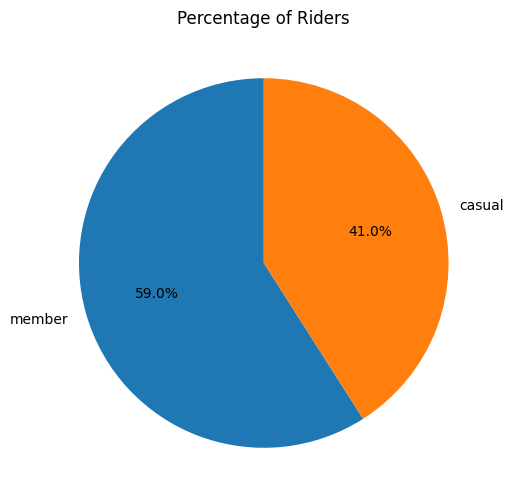

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(riders_count, labels=riders_count.index, startangle = 90, autopct='%1.1f%%')
plt.title('Percentage of Riders')
plt.show()

Count of riders by week days

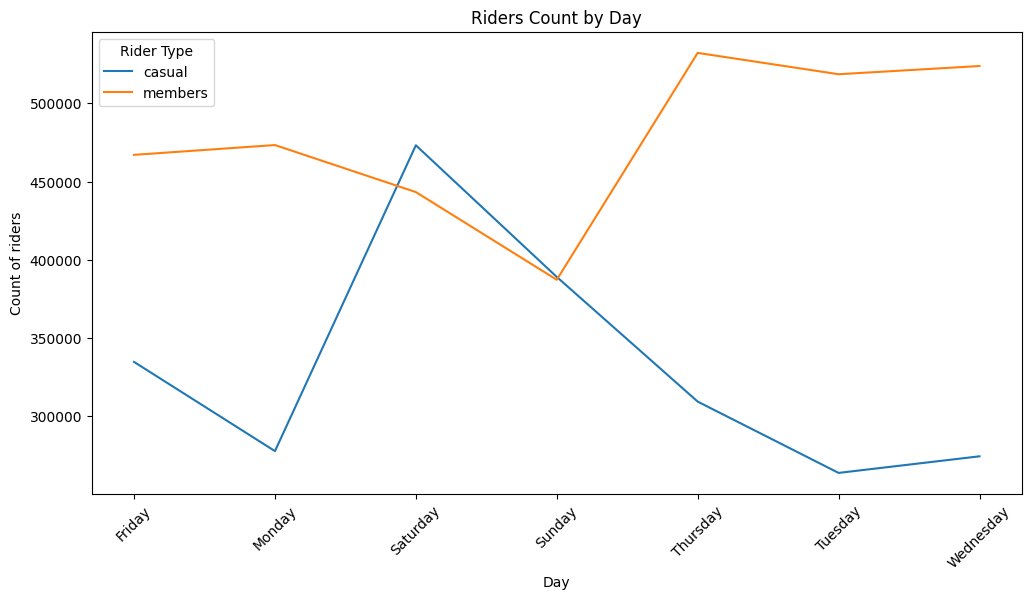

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(casual_riders.index, casual_riders, '-',  label ='casual')
plt.plot(member_riders.index, member_riders, '-', label ='members')
plt.title('Riders Count by Day')
plt.xlabel('Day')
plt.ylabel('Count of riders')
plt.xticks(rotation=45)
plt.legend(title='Rider Type')
plt.show()

Count of riders by month.

<Figure size 1200x600 with 0 Axes>

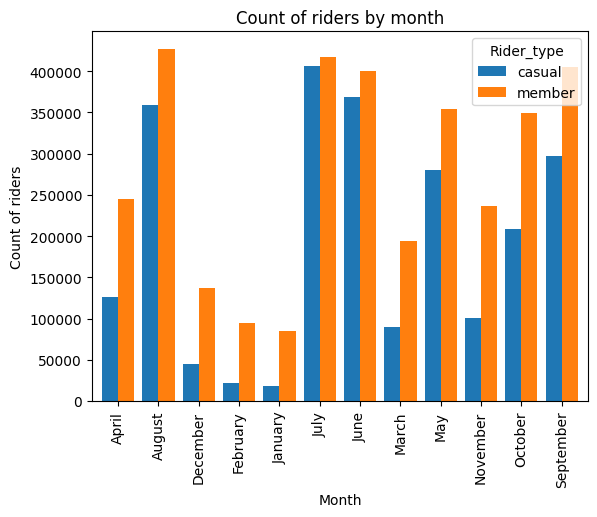

In [ ]:
plt.figure(figsize=(12, 6))
riders_by_month.plot(kind='bar', width=0.8)
plt.title('Count of riders by month')
plt.legend(title='Rider_type')
plt.xlabel('Month')
plt.ylabel('Count of riders')
plt.show()

Preffered bike types by riders.

<Figure size 1200x600 with 0 Axes>

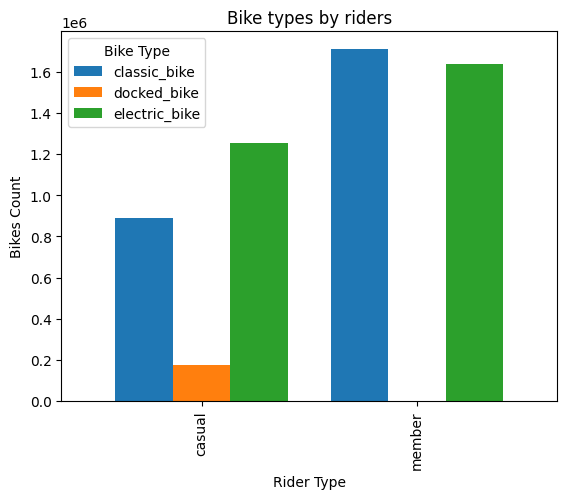

In [ ]:
plt.figure(figsize=(12, 6))
bikes_by_riders.plot(kind='bar', width=0.8)
plt.title('Bike types by riders')
plt.xlabel('Rider Type')
plt.ylabel('Bikes Count')
plt.legend(title='Bike Type')
plt.show()

**Findings Summary**

1. Most riders are members.
2. The average ride length for casual riders is 29 minutes.
3. Casual riders tend to bike on weekends, while members ride more frequently on weekdays.
4. Casual riders prefer electric bikes, whereas members favor classic bikes.
5. Ridership peaks during the summer months and declines in winter.

# Act

Based on the analysis and findings, casual riders make up 41% of our user base, while members represent 59%. This indicates a strong base of loyal riders, suggesting that we could introduce either a loyalty program or a referral program to further increase the members percentage.

Casual riders enjoy their rides for an average of about 29 minutes and prefer to bike more on weekends. Thus, we could introduce limited-time discounts on memberships to encourage casual riders to convert to annual members.

Additionally, casual riders show a preference for electric bikes, while members tend to favor classic bikes. This suggests that we may need to supply preferred bike types to satisty the riders’ needs.

Finally, we should consider an app that allows users to easily subscribe to memberships. This would facilitate the process and make it more convenient for casual riders to become members.